Sample dataset:


,student_id,name,class,comprehension,attention,focus,retention,assessment_score,engagement_time
0,1,Student_1,C,83,32,51,82,52,73
1,2,Student_2,A,47,99,67,38,62,58
2,3,Student_3,C,63,56,82,77,64,110
3,4,Student_4,C,50,38,93,74,74,93
4,5,Student_5,A,90,91,56,81,80,109


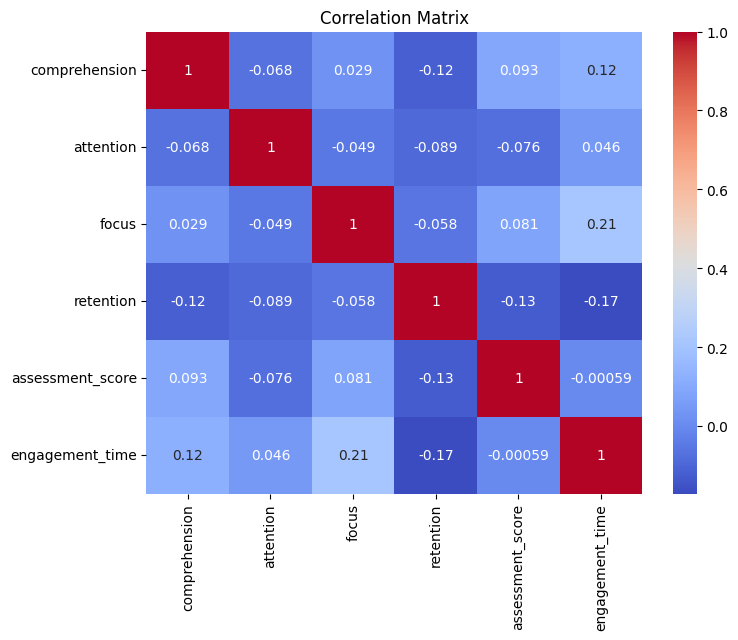


Model Performance:
MSE: 380.59885213242694
R2 Score: -0.2727887974598553

Cluster distribution:
cluster
1    45
0    29
2    26
Name: count, dtype: int64

Dataset saved to student-dashboard/data/students.json

Overview statistics (mean, median, std):
             metric   mean  median        std
0     comprehension  69.73    71.0  16.728887
1         attention  63.43    62.0  21.536558
2             focus  69.81    68.0  18.167957
3         retention  57.99    55.0  22.986379
4  assessment_score  69.06    68.0  17.134536
5   engagement_time  67.22    66.0  28.251247

Top correlations with assessment_score:
assessment_score    1.000000
comprehension       0.092983
focus               0.081222
engagement_time    -0.000591
attention          -0.076221
retention          -0.126844
Name: assessment_score, dtype: float64

Insights:
- Top features correlated with assessment_score: assessment_score, comprehension, focus
- Lowest correlated features: attention, retention
- Cluster sizes: {1: 4

In [1]:
# ==============================
# Student Cognitive Skills Analysis
# ==============================

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --------------------------
# 1. Generate Synthetic Dataset
# --------------------------
np.random.seed(42)
n = 100

df = pd.DataFrame({
    "student_id": range(1, n+1),
    "name": [f"Student_{i}" for i in range(1, n+1)],
    "class": np.random.choice(["A", "B", "C"], n),
    "comprehension": np.random.randint(40, 100, n),
    "attention": np.random.randint(30, 100, n),
    "focus": np.random.randint(35, 100, n),
    "retention": np.random.randint(20, 100, n),
    "assessment_score": np.random.randint(40, 100, n),
    "engagement_time": np.random.randint(20, 120, n)
})

print("Sample dataset:")
display(df.head())

# --------------------------
# 2. Correlation Heatmap
# --------------------------
numeric_cols = ["comprehension", "attention", "focus", "retention", "assessment_score", "engagement_time"]

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# --------------------------
# 3. Simple ML Model (Linear Regression)
# --------------------------
X = df[["comprehension", "attention", "focus", "retention", "engagement_time"]]
y = df["assessment_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Performance:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# --------------------------
# 4. Clustering (Learning Personas)
# --------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df[numeric_cols])

print("\nCluster distribution:")
print(df["cluster"].value_counts())

# --------------------------
# 5. Save Dataset as JSON
# --------------------------
output_path = "student-dashboard/data/students.json"
df.to_json(output_path, orient="records", indent=2)
print(f"\nDataset saved to {output_path}")

# --------------------------
# 6. Overview Stats + Insights
# --------------------------
overview = df[numeric_cols].agg(["mean","median","std"]).T.rename_axis("metric").reset_index()
print("\nOverview statistics (mean, median, std):")
print(overview)

corr = df[numeric_cols].corr()["assessment_score"].sort_values(ascending=False)
print("\nTop correlations with assessment_score:")
print(corr)

insights = [
    f"Top features correlated with assessment_score: {', '.join(corr.head(3).index.tolist())}",
    f"Lowest correlated features: {', '.join(corr.tail(2).index.tolist())}",
    f"Cluster sizes: {df['cluster'].value_counts().to_dict()}",
    f"Regression R2: {r2_score(y_test, y_pred):.3f}"
]
print("\nInsights:")
for s in insights:
    print("- " + s)